# Funciones de activación

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

In [32]:
session = tf.Session()
tf.set_random_seed(2019)
np.random.seed(2019)

In [33]:
batch_size = 50

# Variables para la función sigmoide
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_normal(shape=[1,1]))

# Variables para la función ReLu
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_normal(shape=[1,1]))

x = np.random.normal(loc=5, scale=0.25, size=1000)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

### Función sigmoide

$$ sigmoid(x) = \sigma(x) = \frac{1}{1 + e^{ax + b}} $$

In [34]:
sigmoid_act = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

### Función ReLu (Rectificador Lineal Unitario)

$$ f(x) = \max (0, ax + b) $$

In [35]:
relu_act = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [36]:
target = 0.75

Aplicamos la función de pérdidas $ Loss = \frac{\sum_{i=1}^n (y_i - y_{target})^2}{n} $

In [37]:
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_act, target)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_act, target)))

In [38]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train1 = optimizer.minimize(loss1)
train2 = optimizer.minimize(loss2)

init = tf.global_variables_initializer()
session.run(init)

In [39]:
loss_vector1 = [] # Sigmoid
loss_vector2 = [] # ReLu
act_vector1 = [] # Sigmoid
act_vector2 = [] # ReLu

for i in range(1000):
    rand_idx = np.random.choice(len(x), size=batch_size)
    rand_x = np.transpose([x[rand_idx]])
    
    session.run(train1, feed_dict={x_data: rand_x})
    session.run(train2, feed_dict={x_data: rand_x})
    
    loss_vector1.append(session.run(loss1, feed_dict={x_data: rand_x}))
    loss_vector2.append(session.run(loss2, feed_dict={x_data: rand_x}))

    act_vector1.append(np.mean(session.run(sigmoid_act, feed_dict={x_data: rand_x})))
    act_vector2.append(np.mean(session.run(relu_act, feed_dict={x_data: rand_x})))

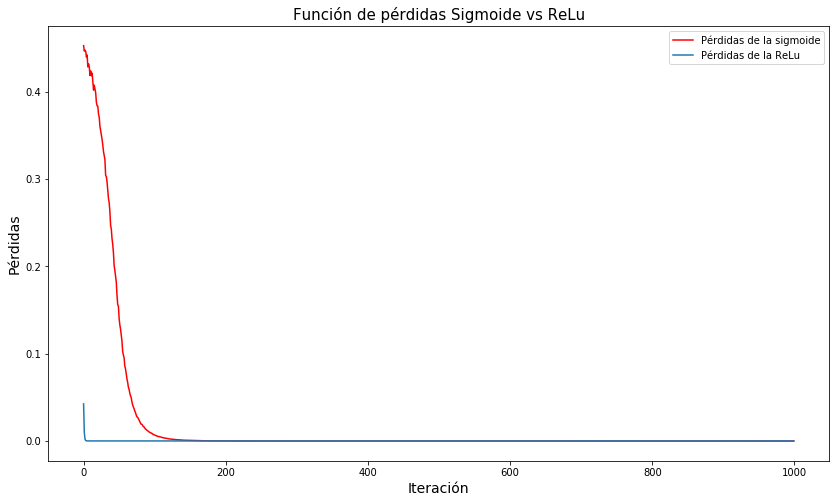

In [40]:
plt.figure(figsize=(14,8))
plt.plot(loss_vector1, "r", label="Pérdidas de la sigmoide")
plt.plot(loss_vector2, label="Pérdidas de la ReLu")
plt.title("Función de pérdidas Sigmoide vs ReLu", fontsize=15)
plt.xlabel("Iteración", fontsize=14)
plt.ylabel("Pérdidas", fontsize=14)
plt.legend(loc="upper right")
plt.show()

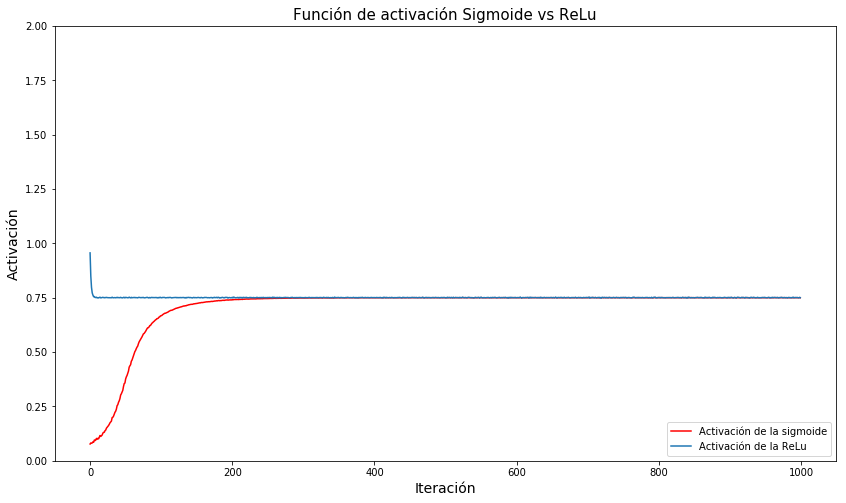

In [41]:
plt.figure(figsize=(14,8))
plt.plot(act_vector1, "r", label="Activación de la sigmoide")
plt.plot(act_vector2, label="Activación de la ReLu")
plt.title("Función de activación Sigmoide vs ReLu", fontsize=15)
plt.xlabel("Iteración", fontsize=14)
plt.ylabel("Activación", fontsize=14)
plt.ylim([0,2])
plt.legend(loc="lower right")
plt.show()